## Example Heat

In this file a heat spreading function with is demonstratively implemented. <br>
It shows the Proof of Concept for Runge-Kutta 4th Order. The heat equation is implemented on a 2D grid, like the one we use for the more complex coupled SIR Information Model.<br>
The needed imports are: <b>numpy, matplotlib, typing, collections, functools </b> and <b>rk4 </b> .<br>
The results of the heat-spreading are shown in the plots below.

In [ ]:
# library imports
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb

In [ ]:
from typing import Union
from collections.abc import Callable
from functools import partial

In [ ]:
# local imports
from rk4 import rk4

importing Jupyter notebook from rk4.ipynb


In [ ]:
def f_heat(t: float, y: np.ndarray, alpha: float=0.1) -> np.ndarray:
    """
    differential stucture of heat equation: different compartments interact with their direct neighbors,emitting
    heat proportional to their temperature
    t: time
    y: function value, here the temperature on a 2D grid
    returns: array with the change in y
    """
    dy = np.zeros(shape=y.shape)  # empty array to be filled
    
    # depending on how to treat the edges of the grid there might be different implementations
    # here no heat can flow outside the defined grid
    # -1 == len(dy)
    
    dy[:-1, :] -= alpha*y[:-1, :]  # flow downwards
    dy[1:, :] += alpha*y[:-1, :]    
    
    dy[1:, :] -= alpha*y[1:, :]  # flow upwards
    dy[:-1, :] += alpha*y[1:, :]
    
    dy[:, :-1] -= alpha*y[:, :-1]  # flow towards the right
    dy[:, 1:] += alpha*y[:, :-1]
    
    dy[:, 1:] -= alpha*y[:, 1:]  # flow towards the left
    dy[:, :-1] += alpha*y[:, 1:]
    return dy


In [ ]:
# compute the heat distribution over time
y0 = np.zeros(shape=(100, 100))
y0[49, 49] = 1
t = np.linspace(0, 1000, 1000+1)
t, y = rk4(f_heat, y0, t)

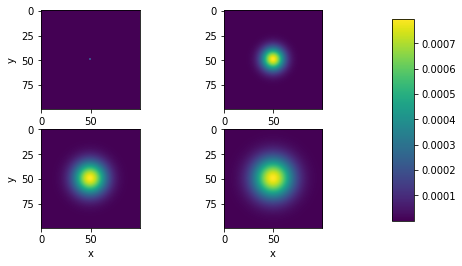

In [ ]:
# just a simple inspection, for proof of concept
fig = plt.figure()
axes = fig.subplots(2, 2).reshape(2, 2)
axes[0, 0].imshow(y[..., 0])
axes[0, 1].imshow(y[..., 333])
axes[1, 0].imshow(y[..., 666])
im = axes[1, 1].imshow(y[..., 1000])
for ax in axes[1, :]:
    ax.set_xlabel('x')
for ax in axes[:, 0]:
    ax.set_ylabel('y')
cbar_ax = fig.add_axes([1, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ac0f8ce2-3132-47be-a4d1-6216636e93ff' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>